In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime, timedelta

In [3]:
import os
os.chdir('ukbiobank/code/')

### How do the UKB diagnoses compare in size to the MSHS ones?

In [8]:
# Export specific files for all diagnoses of interest
ncd_icd = pd.read_parquet('../tidy_data/ncd_diagnoses.parquet')

sud_icd = pd.read_parquet('../tidy_data/sud_diagnoses.parquet')

oud_icd = pd.read_parquet('../tidy_data/oud_diagnoses.parquet')

aud_icd = pd.read_parquet('../tidy_data/aud_diagnoses.parquet')

tobacco_icd = pd.read_parquet('../tidy_data/tobacco_diagnoses.parquet')

hiv_icd = pd.read_parquet('../tidy_data/hiv_diagnoses.parquet')

sickle_icd = pd.read_parquet('../tidy_data/sickle_diagnoses.parquet')

hepc_icd = pd.read_parquet('../tidy_data/hepc_diagnoses.parquet')


In [7]:
ms_ncd_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/ncd_diagnoses.parquet')

ms_sud_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/sud_diagnoses.parquet')

ms_oud_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/oud_diagnoses.parquet')

ms_aud_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/aud_diagnoses.parquet')

ms_tobacco_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/tobacco_diagnoses.parquet')

ms_hiv_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/hiv_diagnoses.parquet')

ms_sickle_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/sickle_diagnoses.parquet')

ms_hepc_icd = pd.read_parquet('../../MSDW1794_V3/tidy_data/hepc_diagnoses.parquet')

In [13]:
print('ncd', ncd_icd.shape, ms_ncd_icd.shape,ms_ncd_icd.shape[0]/ncd_icd.shape[0],'\n',
        'sud', sud_icd.shape, ms_sud_icd.shape,ms_sud_icd.shape[0]/sud_icd.shape[0],'\n',
        'oud', oud_icd.shape, ms_oud_icd.shape,ms_oud_icd.shape[0]/oud_icd.shape[0],'\n',
        'aud', aud_icd.shape, ms_aud_icd.shape,ms_aud_icd.shape[0]/aud_icd.shape[0],'\n',
        'tobacco', tobacco_icd.shape, ms_tobacco_icd.shape,ms_tobacco_icd.shape[0]/tobacco_icd.shape[0],'\n',
        'hiv', hiv_icd.shape, ms_hiv_icd.shape,ms_hiv_icd.shape[0]/hiv_icd.shape[0],'\n',
        'sickle', sickle_icd.shape, ms_sickle_icd.shape,ms_sickle_icd.shape[0]/sickle_icd.shape[0],'\n',
        'hepc', hepc_icd.shape, ms_hepc_icd.shape,ms_hepc_icd.shape[0]/hepc_icd.shape[0],'\n')
        

ncd (38135, 5) (553567, 9) 14.515982693064114 
 sud (123224, 5) (1586300, 9) 12.873303901837305 
 oud (791, 5) (173536, 9) 219.3881163084703 
 aud (41585, 5) (429572, 9) 10.329974750511001 
 tobacco (79073, 5) (598453, 9) 7.568360881716894 
 hiv (7520, 5) (1833501, 9) 243.81662234042554 
 sickle (2893, 5) (146719, 9) 50.715174559281024 
 hepc (4326, 5) (325921, 9) 75.34003698566805 



### What years should be used for the UKB VoE? From histograms of diagnoses and meds, diagnoses end before 2020/1/1, and meds have some fraction of 2017. Let's end at 2017/1/1, and begin at 1990 and see what we get. Can always discard the first few years.

In [ ]:
all_dx = pd.read_parquet('../tidy_data/icd_data_all_dx.parquet')
med = pd.read_parquet('../tidy_data/med.parquet')

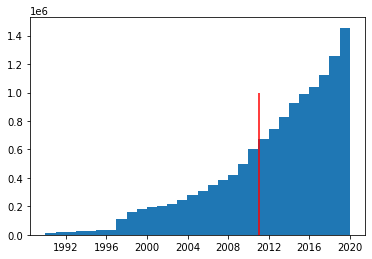

In [70]:
plt.hist(all_dx['event_dt'], bins=np.arange(datetime(1990,1,1), datetime(2020,1,1), timedelta(days=365)));
plt.vlines(datetime(2011,1,1), 0, 1000000, color='red')

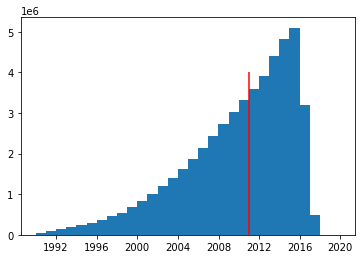

In [73]:
plt.hist(med['issue_date'], bins=np.arange(datetime(1990,1,1), datetime(2020,1,1), timedelta(days=365)));
plt.vlines(datetime(2011,1,1), 0, 4000000, color='red')

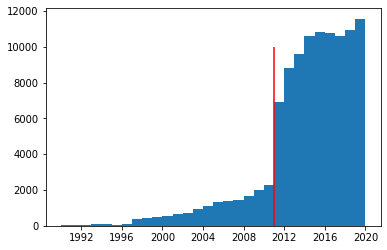

In [51]:
plt.hist(sud_icd['event_dt'], bins=np.arange(datetime(1990,1,1), datetime(2020,1,1), timedelta(days=365)));
plt.vlines(datetime(2011,1,1), 0, 10000, color='red')

In [74]:
opioid_med = pd.read_parquet('../tidy_data/opioid_med.parquet')

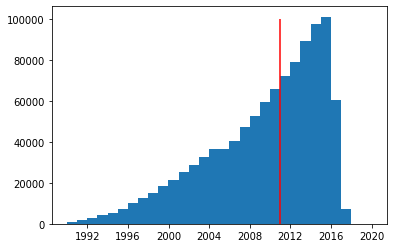

In [77]:
plt.hist(opioid_med['issue_date'], bins=np.arange(datetime(1990,1,1), datetime(2020,1,1), timedelta(days=365)));
plt.vlines(datetime(2011,1,1), 0, 100000, color='red')

In [12]:
bnf_fill.BNF_Paragraph_first6char = bnf_fill.BNF_Paragraph_first6char.str.lower()
bnf_fill.drug_name = bnf_fill.drug_name.str.lower()

In [27]:
bnf_fill.to_parquet('../tidy_data/bnf_fill.parquet')

In [19]:
methadone = bnf_fill[bnf_fill.drug_name.str.contains('methadone')]

In [23]:
print(methadone.shape)

(3141, 9)


In [25]:
methadone[methadone.BNF_Paragraph_first5char!='no results']

,eid,bnf_code,drug_name,quantity,issue_date,read_2,3rd_col,BNF_Paragraph_first5char,BNF_Paragraph_first6char
949066,2059627,04070200,methadone 5mg tablets,420.000,2014-06-19,djcy.,04070200,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
949141,2059627,04070200,methadone 5mg tablets,300.000,2013-05-16,djcy.,04070200,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
949144,2059627,04070200,methadone 5mg tablets,420.000,2015-06-11,djcy.,04070200,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
1357727,1117776,04.07.02.00.00,methadone 1mg/ml oral solution,1 pack of 100 mls,2012-05-24,None,0407020000,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
1920945,1434812,04.07.02.00.00,methadone 1mg/ml oral solution,500 mls,2009-09-08,None,0407020000,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
...,...,...,...,...,...,...,...,...,...
43342608,5763893,04.07.02.00.00,methadone 1mg/ml oral solution sugar free,105 ml,2016-05-19,None,0407020000,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
43342611,5763893,04.07.02.00.00,methadone 1mg/ml oral solution sugar free,105 ml,2016-01-14,None,0407020000,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
43342613,5763893,04.07.02.00.00,methadone 1mg/ml oral solution sugar free,105 ml,2016-03-24,None,0407020000,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics
43470352,5833964,04.07.02.00.00,methadone 1mg/ml oral solution sugar free,30 ml,2014-12-24,None,0407020000,['Non-Opioid Analgesics And Compound Prep' 'Op...,opioid analgesics


In [14]:
'''
manual data cleaning because some of the entries filled when using the first 5 but not the first 6 were:
"['Alcohol Dependence' 'Nicotine Dependence' 'Opioid Dependence']"
"['Tricyclic & Related Antidepressant Drugs'\n 'Monoamine-Oxidase Inhibitors (Maois)'\n 'Selective Serotonin Re-Uptake Inhibitors' 'Other Antidepressant Drugs']"
'[\'Dopaminergic Drugs Used In Parkinsonism\'\n "Antimuscarinic Drugs Used In Parkin\'ism"\n \'Essentialtremor,Chorea,Tics&Reldisorders\']'
"['Non-Opioid Analgesics And Compound Prep' 'Opioid Analgesics'\n 'Neuropathic Pain' 'Antimigraine Drugs']"
'''

fixing = bnf_fill[(bnf_fill.BNF_Paragraph_first5char.isin([
"['Alcohol Dependence' 'Nicotine Dependence' 'Opioid Dependence']"
,"['Tricyclic & Related Antidepressant Drugs'\n 'Monoamine-Oxidase Inhibitors (Maois)'\n 'Selective Serotonin Re-Uptake Inhibitors' 'Other Antidepressant Drugs']"
,'[\'Dopaminergic Drugs Used In Parkinsonism\'\n "Antimuscarinic Drugs Used In Parkin\'ism"\n \'Essentialtremor,Chorea,Tics&Reldisorders\']'
,"['Non-Opioid Analgesics And Compound Prep' 'Opioid Analgesics'\n 'Neuropathic Pain' 'Antimigraine Drugs']"])) \
                 & (bnf_fill.BNF_Paragraph_first6char=='no results')]

In [15]:
oud = ['methadone','naltrexone']
aud = ['disulfiram', 'acamprosate']
fixing.loc[fixing.drug_name.str.contains('|'.join(oud)), 'BNF_Paragraph_first6char'] = 'opioid_dependence'
fixing.loc[fixing.drug_name.str.contains('|'.join(aud)), 'BNF_Paragraph_first6char'] = 'alcohol_dependence'

/hpc/packages/minerva-centos7/py_packages/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
fixing = fixing[(fixing.BNF_Paragraph_first5char.isin([
"['Alcohol Dependence' 'Nicotine Dependence' 'Opioid Dependence']"
,"['Tricyclic & Related Antidepressant Drugs'\n 'Monoamine-Oxidase Inhibitors (Maois)'\n 'Selective Serotonin Re-Uptake Inhibitors' 'Other Antidepressant Drugs']"
,'[\'Dopaminergic Drugs Used In Parkinsonism\'\n "Antimuscarinic Drugs Used In Parkin\'ism"\n \'Essentialtremor,Chorea,Tics&Reldisorders\']'
,"['Non-Opioid Analgesics And Compound Prep' 'Opioid Analgesics'\n 'Neuropathic Pain' 'Antimigraine Drugs']"])) \
                 & (fixing.BNF_Paragraph_first6char=='no results')]

In [46]:
bnf_fill.loc[(bnf_fill.BNF_Paragraph_first6char.str.contains('opioid')) & 
         (bnf_fill.BNF_Paragraph_first6char.str.contains('alcohol')), 'BNF_Paragraph_first6char'] = 'nicotine dependence'

In [17]:
Counter(fixing.drug_name).most_common()

[('pregabalin 300mg capsules', 192),
 ('pregabalin 150mg capsules', 178),
 ('pregabalin 75mg capsules', 156),
 ('nicorette inhalator inhalation cartridge plus mouthpiece refill pack  10mg',
  113),
 ('pregabalin 50mg capsules', 69),
 ('pregabalin 200mg capsules', 48),
 ('ropinirole 1mg tablets', 48),
 ('nicotine  inhalation cartridge with mouthpiece (refill)  10 mg/cartridge',
  36),
 ('pregabalin 25mg capsules', 35),
 ('antabuse 200  tablets  200 mg', 23),
 ('pregabalin 100mg capsules', 22),
 ('ropinirole 5mg tablets', 22),
 ('ropinirole 2mg tablets', 21),
 ('rasagiline 1mg tablets', 18),
 ('lyrica 300mg capsules (pfizer ltd)', 16),
 ('nicorette inhalator  inhalation cartridge with mouthpiece (refill)  10 mg/cartridge',
  13),
 ('pramipexole 88microgram tablets', 11),
 ('requip xl 8mg tablets (glaxosmithkline uk ltd)', 10),
 ('entacapone 200mg tablets', 8),
 ('selegiline 5mg tablets', 4),
 ('pregabalin caps 75mg', 2),
 ('pramipexole 700microgram tablets', 2),
 ('pramipexole 180microgr

In [53]:
sum(bnf_fill.BNF_Paragraph=='no results'), \
sum(bnf_fill.BNF_Paragraph=='no results')/bnf_fill.shape[0]

(602554, 0.013769360728394004)

In [17]:
sum(bnf_fill.BNF_Paragraph_first5char=='no results'), \
sum(bnf_fill.BNF_Paragraph_first5char=='no results')/bnf_fill.shape[0]

(703536, 0.016076967324773223)

In [13]:
sum(bnf_fill.BNF_Paragraph_first6char=='no results'), \
sum(bnf_fill.BNF_Paragraph_first6char=='no results')/bnf_fill.shape[0]

(7231090, 0.16524242917561346)

In [20]:
bnf_fill[(bnf_fill.BNF_Paragraph_first5char!='no results') & \
         (bnf_fill.BNF_Paragraph_first6char=='no results')].shape

(6527554, 9)

In [24]:
(3214151+1493628+517714+300578+217808+208178+205361+203102+50594+42946)/bnf_fill[(bnf_fill.BNF_Paragraph_first5char!='no results') & \
         (bnf_fill.BNF_Paragraph_first6char=='no results')].shape[0]

0.9887409587113335

In [19]:
# lipid-regulating: 3214151; antiplatelet: 1493628; topical corticosteroids: 517714, glaucoma: 300578
Counter(bnf_fill[(bnf_fill.BNF_Paragraph_first5char!='no results') &\
        (bnf_fill.BNF_Paragraph_first6char=='no results')].BNF_Paragraph_first5char).most_common()

[('Lipid-Regulating Drugs', 3214151),
 ('Antiplatelet Drugs', 1493628),
 ('Topical Corticosteroids', 517714),
 ('Treatment Of Glaucoma', 300578),
 ('Antispasmod.&Other Drgs Alt.Gut Motility', 217808),
 ("['Foods For Special Diets' 'Enteral Nutrition']", 208178),
 ('Vaccines And Antisera', 205361),
 ('Drugs Used In Nausea And Vertigo', 203102),
 ('Shampoo&Other Preps For Scalp&Hair Cond', 50594),
 ("['Adrenoceptor Agonists' 'Antimuscarinic Bronchodilators' 'Theophylline'\n 'Compound Bronchodilator Preparations']",
  42946),
 ("['Test for Helicobacter Pylori' 'H2-Receptor Antagonists'\n 'Selective Antimuscarinics' 'Chelates And Complexes'\n 'Prostaglandin Analogues' 'Proton Pump Inhibitors'\n 'Other Antisec Drugs+Mucosal Protectants']",
  27948),
 ("['DUMMY PARAGRAPH 210101' 'DUMMY PARAGRAPH 210102'\n 'DUMMY PARAGRAPH 210103' 'DUMMY PARAGRAPH 210104'\n 'DUMMY PARAGRAPH 210105' 'DUMMY PARAGRAPH 210106'\n 'DUMMY PARAGRAPH 210108' 'DUMMY PARAGRAPH 210109']",
  11814),
 ("['Antacids and Sime

In [40]:
value_lens_first4char = [len(x) for x in bnf_paragraph_bnf_fill.values()]

In [49]:
value_lens_first5char = [len(x) for x in bnf_paragraph_bnf_fill.values()]

In [63]:
value_lens_first6char = [len(x) for x in bnf_paragraph_bnf_fill.values()]

In [52]:
med = pd.read_parquet('../tidy_data/med.parquet')

In [53]:
med.head()

,eid,bnf_code,drug_name,quantity,issue_date,read_2,AGE_AT_ENCOUNTER
0,1000047,02090000,ASPIRIN 75MG GASTRO-RESISTANT TABLETS,56.000,2014-01-22,bu2B.,66.225873
1,1000047,02080200,WARFARIN 3MG TABLETS,56.000,2015-04-17,bs18.,67.457906
2,1000047,07040150,TAMSULOSIN 400MICROGRAM MODIFIED-RELEASE CAPSULES,28.000,2016-04-22,gc71.,68.473648
3,1000047,01030500,OMEPRAZOLE 20MG GASTRO-RESISTANT CAPSULES,112.000,2017-02-22,a6b1.,69.311431
4,1000047,02120400,SIMVASTATIN 40MG TABLETS,56.000,2016-09-14,bxd5.,68.870637


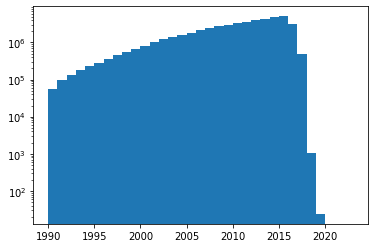

In [58]:
n,bins,patches = plt.hist(med.issue_date.dt.year, log=True, bins=np.arange(1990,2024,1))

In [59]:
pd.DataFrame({'n':n,'bins':bins[1:]})

,n,bins
0,56486.0,1991
1,96167.0,1992
2,134027.0,1993
3,180203.0,1994
4,228511.0,1995
5,282345.0,1996
6,364499.0,1997
7,454846.0,1998
8,546454.0,1999
9,671794.0,2000


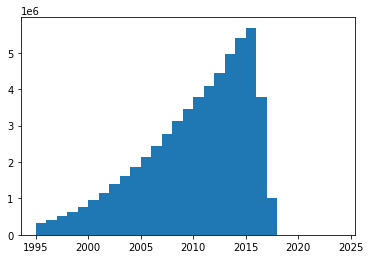

In [35]:
n,bins,patches = plt.hist(med.issue_date.dt.year, bins=np.arange(1995,2025,1))

In [34]:
pd.DataFrame({'n':n,'bins':bins[1:]})

,n,bins
0,324339.0,1996
1,417878.0,1997
2,519375.0,1998
3,624632.0,1999
4,766914.0,2000
5,942509.0,2001
6,1156213.0,2002
7,1384643.0,2003
8,1610272.0,2004
9,1873304.0,2005
